In [7]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline


In [8]:
dow = pd.read_csv('/home/wayne/AthenaML/AthenaPytorch/EURUSD=X.csv');

In [11]:
dow.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2021-08-19,1.170385,1.170686,1.166875,1.170330,1.170330,0
1,2021-08-20,1.167679,1.169100,1.166494,1.167660,1.167660,0
2,2021-08-23,1.169974,1.174329,1.169561,1.169755,1.169755,0
3,2021-08-24,1.174674,1.176484,1.172814,1.174453,1.174453,0
4,2021-08-25,1.175503,1.176055,1.172855,1.175309,1.175309,0


In [40]:
dow.shape

(262, 7)

In [17]:
training_set = dow.iloc[:,1:2].values


print(training_set)
print(training_set.shape)

[[1.170385]
 [1.167679]
 [1.169974]
 [1.174674]
 [1.175503]
 [1.1773  ]
 [1.175295]
 [1.179997]
 [1.179941]
 [1.181195]
 [1.184231]
 [1.187423]
 [1.188594]
 [1.187395]
 [1.184553]
 [1.182033]
 [1.182355]
 [1.181251]
 [1.18107 ]
 [1.180359]
 [1.181935]
 [1.176484]
 [1.172883]
 [1.172567]
 [1.172608]
 [1.168893]
 [1.174178]
 [1.172209]
 [1.169604]
 [1.168688]
 [1.160227]
 [1.157421]
 [1.160726]
 [1.161656]
 [1.159514]
 [1.155535]
 [1.155922]
 [1.156591]
 [1.155295]
 [1.153097]
 [1.159958]
 [1.159071]
 [1.159595]
 [1.161454]
 [1.163386]
 [1.165243]
 [1.162588]
 [1.164131]
 [1.16117 ]
 [1.159824]
 [1.159891]
 [1.168374]
 [1.155936]
 [1.160174]
 [1.158078]
 [1.161575]
 [1.155668]
 [1.156845]
 [1.158869]
 [1.159366]
 [1.148567]
 [1.14478 ]
 [1.14423 ]
 [1.136738]
 [1.131618]
 [1.131811]
 [1.13701 ]
 [1.127574]
 [1.124354]
 [1.124391]
 [1.120699]
 [1.1209  ]
 [1.129114]
 [1.129357]
 [1.133003]
 [1.131964]
 [1.130684]
 [1.130263]
 [1.128452]
 [1.127307]
 [1.134404]
 [1.129408]
 [1.131119]
 [1.

In [41]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0,1))
scaled_training_set = scaler.fit_transform(training_set)

scaled_training_set

scaled_training_set.shape

(262, 1)

In [52]:
Xtrain_size=0.6

Xtest_size=0.4

Xtrain_index = int(len(scaled_training_set) * Xtrain_size)

Xtrain = scaled_training_set[0:Xtrain_index]
ytrain = scaled_training_set[0:Xtrain_index]

Xtest = scaled_training_set[Xtrain_index:]
ytest = scaled_training_set[Xtrain_index:]



Xtrain=np.array(Xtrain)
ytrain = np.array(ytrain)
Xtest=np.array(Xtest)
    

In [56]:
print(Xtrain.shape)
print(Xtest.shape)
print(ytrain.shape)

(157, 1, 1)
(105, 1)
(157, 1)


In [57]:
Xtrain = np.reshape(Xtrain,(Xtrain.shape[0], Xtrain.shape[1],1))

Xtrain.shape


(157, 1, 1)

In [58]:
from keras.models import Sequential
from keras.layers import LSTM
from keras.layers import Dense
from keras.layers import Dropout

regressor = Sequential()

regressor.add(LSTM(units = 50, return_sequences=True, input_shape=(Xtrain.shape[1], 1)))
regressor.add(Dropout(0.2))

regressor.add(LSTM(units = 50, return_sequences=True))
regressor.add(Dropout(0.2))

regressor.add(LSTM(units = 50, return_sequences=True))
regressor.add(Dropout(0.2))

regressor.add(LSTM(units = 50))
regressor.add(Dropout(0.2))

regressor.add(Dense(units=1))


In [72]:
regressor.compile(optimizer='adam', loss='mean_squared_error')
actual_stock_price=regressor.fit(Xtrain, ytrain, epochs=100, batch_size=32)

Epoch 1/100
5/5 [==============================] - 13s 24ms/step - loss: 0.0017
Epoch 2/100
5/5 [==============================] - 0s 27ms/step - loss: 0.0014
Epoch 3/100
5/5 [==============================] - 0s 31ms/step - loss: 0.0016
Epoch 4/100
5/5 [==============================] - 0s 34ms/step - loss: 0.0014
Epoch 5/100
5/5 [==============================] - 0s 24ms/step - loss: 0.0017
Epoch 6/100
5/5 [==============================] - 0s 24ms/step - loss: 0.0011
Epoch 7/100
5/5 [==============================] - 0s 28ms/step - loss: 0.0012
Epoch 8/100
5/5 [==============================] - 0s 24ms/step - loss: 0.0015
Epoch 9/100
5/5 [==============================] - 0s 26ms/step - loss: 0.0014
Epoch 10/100
5/5 [==============================] - 0s 30ms/step - loss: 0.0014
Epoch 11/100
5/5 [==============================] - 0s 24ms/step - loss: 0.0013
Epoch 12/100
5/5 [==============================] - 0s 19ms/step - loss: 0.0015
Epoch 13/100
5/5 [==============================

In [80]:
Xtest = np.array(Xtest)
#Xtest = np.reshape(Xtest,(Xtest.shape[0], Xtest.shape[1],1))

In [82]:
predicted_stock_price = regressor.predict(Xtest)
predicted_stock_price = scaler.inverse_transform(predicted_stock_price)




4/4 [==============================] - 0s 9ms/step


ValueError: x and y can be no greater than 2D, but have shapes (105,) and (105, 1, 1)

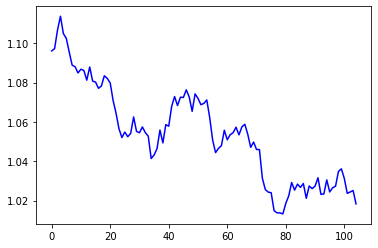

In [83]:
plt.plot(predicted_stock_price,color='blue', label='predicted_stock_price')
plt.plot(Xtest,color='red', label='actual_stock_price')

plt.title('EURUSD price prediction')

plt.legend()

In [10]:
import torch.nn as nn 

#hyperparameters
input_size=784
hidden_sizes=[256,64]
output_size=10

model = nn.Sequential(
    nn.Linear(input_size, hidden_sizes[0]),
    nn.ReLu(),
    nn.Linear(hidden_sizes[0], hidden_sizes[1]),
    nn.ReLu(),
    nn.Linear(hidden_sizes[1],output_size),
    nn.Softmax(dim=1)
)

print(model)




ModuleNotFoundError: No module named 'torch'